### **1. Загрузка исходных данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv("datasets\MIN_season_2008_2023.csv")
df.sample(3)

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
3691,MIN,2017,MIN,2017020540,MIN,FLA,AWAY,20171222,Team Level,all,...,48.924,38.0,37.147,4.0,0.331,0.792,0.792,2.274,2.224,2.204
3567,MIN,2017,MIN,2017020180,MIN,WPG,HOME,20171031,Team Level,5on5,...,26.148,15.0,16.342,0.0,0.158,0.000,0.000,1.143,1.247,1.245
5630,MIN,2022,MIN,2022020843,MIN,NJD,HOME,20230211,Team Level,other,...,7.000,5.0,5.000,0.0,0.060,0.000,0.000,0.610,0.610,0.610


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Columns: 110 entries, team to scoreFlurryAdjustedTotalShotCreditAgainst
dtypes: float64(100), int64(3), object(7)
memory usage: 5.2+ MB


### **2. Предобработка**

#### **2.1. Первичная предобработка**

* настройка экрана вывода для выбора дальнейших расчетных параметров

In [4]:
pd.set_option('display.max_columns', None)

* переименование столбцов в нижний регистр

In [5]:
df.columns = df.columns.str.lower()
df.head(2)

,team,season,name,gameid,playerteam,opposingteam,home_or_away,gamedate,position,situation,xgoalspercentage,corsipercentage,fenwickpercentage,icetime,xongoalfor,xgoalsfor,xreboundsfor,xfreezefor,xplaystoppedfor,xplaycontinuedinzonefor,xplaycontinuedoutsidezonefor,flurryadjustedxgoalsfor,scorevenueadjustedxgoalsfor,flurryscorevenueadjustedxgoalsfor,shotsongoalfor,missedshotsfor,blockedshotattemptsfor,shotattemptsfor,goalsfor,reboundsfor,reboundgoalsfor,freezefor,playstoppedfor,playcontinuedinzonefor,playcontinuedoutsidezonefor,savedshotsongoalfor,savedunblockedshotattemptsfor,penaltiesfor,penalityminutesfor,faceoffswonfor,hitsfor,takeawaysfor,giveawaysfor,lowdangershotsfor,mediumdangershotsfor,highdangershotsfor,lowdangerxgoalsfor,mediumdangerxgoalsfor,highdangerxgoalsfor,lowdangergoalsfor,mediumdangergoalsfor,highdangergoalsfor,scoreadjustedshotsattemptsfor,unblockedshotattemptsfor,scoreadjustedunblockedshotattemptsfor,dzonegiveawaysfor,xgoalsfromxreboundsofshotsfor,xgoalsfromactualreboundsofshotsfor,reboundxgoalsfor,totalshotcreditfor,scoreadjustedtotalshotcreditfor,scoreflurryadjustedtotalshotcreditfor,xongoalagainst,xgoalsagainst,xreboundsagainst,xfreezeagainst,xplaystoppedagainst,xplaycontinuedinzoneagainst,xplaycontinuedoutsidezoneagainst,flurryadjustedxgoalsagainst,scorevenueadjustedxgoalsagainst,flurryscorevenueadjustedxgoalsagainst,shotsongoalagainst,missedshotsagainst,blockedshotattemptsagainst,shotattemptsagainst,goalsagainst,reboundsagainst,reboundgoalsagainst,freezeagainst,playstoppedagainst,playcontinuedinzoneagainst,playcontinuedoutsidezoneagainst,savedshotsongoalagainst,savedunblockedshotattemptsagainst,penaltiesagainst,penalityminutesagainst,faceoffswonagainst,hitsagainst,takeawaysagainst,giveawaysagainst,lowdangershotsagainst,mediumdangershotsagainst,highdangershotsagainst,lowdangerxgoalsagainst,mediumdangerxgoalsagainst,highdangerxgoalsagainst,lowdangergoalsagainst,mediumdangergoalsagainst,highdangergoalsagainst,scoreadjustedshotsattemptsagainst,unblockedshotattemptsagainst,scoreadjustedunblockedshotattemptsagainst,dzonegiveawaysagainst,xgoalsfromxreboundsofshotsagainst,xgoalsfromactualreboundsofshotsagainst,reboundxgoalsagainst,totalshotcreditagainst,scoreadjustedtotalshotcreditagainst,scoreflurryadjustedtotalshotcreditagainst
0,MIN,2008,MIN,2008020025,MIN,BOS,HOME,20081011,Team Level,other,0.0000,0.0000,0.0000,44.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.065,0.000,0.000,0.000,0.000,0.000,0.065,0.065,0.065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.065,0.00,0.000,0.0,0.0,0.0,1.00,1.0,1.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
1,MIN,2008,MIN,2008020025,MIN,BOS,HOME,20081011,Team Level,all,0.4946,0.4112,0.4091,3600.0,25.812,2.077,1.937,5.413,0.797,15.08,10.696,2.045,2.049,2.018,26.0,10.0,8.0,44.0,4.0,1.0,0.0,5.0,0.0,17.0,9.0,22.0,32.0,5.0,12.0,19.0,15.0,12.0,8.0,28.0,7.0,1.0,0.988,0.795,0.294,2.0,2.0,0.0,45.415,36.0,36.476,2.0,0.407,0.294,0.294,2.19,2.171,2.151,36.831,2.122,2.379,9.328,1.134,20.892,15.211,2.010,2.129,2.020,37.0,15.0,11.0,63.0,3.0,3.0,0.0,8.0,1.0,18.0,19.0,34.0,49.0,5.0,10.0,32.0,16.0,10.0,8.0,47.0,3.0,2.0,1.178,0.36,0.584,3.0,0.0,0.0,60.76,52.0,51.568,4.0,0.517,0.732,0.732,1.841,1.839,1.819


* проверка наличия явных дубликатов

In [6]:
df.duplicated().sum() 

0

* изменение типа данных столбца date к формату времени

In [7]:
df['gamedate'] = pd.to_datetime(df['gamedate'], format='%Y%m%d')
df.head(2)

,team,season,name,gameid,playerteam,opposingteam,home_or_away,gamedate,position,situation,xgoalspercentage,corsipercentage,fenwickpercentage,icetime,xongoalfor,xgoalsfor,xreboundsfor,xfreezefor,xplaystoppedfor,xplaycontinuedinzonefor,xplaycontinuedoutsidezonefor,flurryadjustedxgoalsfor,scorevenueadjustedxgoalsfor,flurryscorevenueadjustedxgoalsfor,shotsongoalfor,missedshotsfor,blockedshotattemptsfor,shotattemptsfor,goalsfor,reboundsfor,reboundgoalsfor,freezefor,playstoppedfor,playcontinuedinzonefor,playcontinuedoutsidezonefor,savedshotsongoalfor,savedunblockedshotattemptsfor,penaltiesfor,penalityminutesfor,faceoffswonfor,hitsfor,takeawaysfor,giveawaysfor,lowdangershotsfor,mediumdangershotsfor,highdangershotsfor,lowdangerxgoalsfor,mediumdangerxgoalsfor,highdangerxgoalsfor,lowdangergoalsfor,mediumdangergoalsfor,highdangergoalsfor,scoreadjustedshotsattemptsfor,unblockedshotattemptsfor,scoreadjustedunblockedshotattemptsfor,dzonegiveawaysfor,xgoalsfromxreboundsofshotsfor,xgoalsfromactualreboundsofshotsfor,reboundxgoalsfor,totalshotcreditfor,scoreadjustedtotalshotcreditfor,scoreflurryadjustedtotalshotcreditfor,xongoalagainst,xgoalsagainst,xreboundsagainst,xfreezeagainst,xplaystoppedagainst,xplaycontinuedinzoneagainst,xplaycontinuedoutsidezoneagainst,flurryadjustedxgoalsagainst,scorevenueadjustedxgoalsagainst,flurryscorevenueadjustedxgoalsagainst,shotsongoalagainst,missedshotsagainst,blockedshotattemptsagainst,shotattemptsagainst,goalsagainst,reboundsagainst,reboundgoalsagainst,freezeagainst,playstoppedagainst,playcontinuedinzoneagainst,playcontinuedoutsidezoneagainst,savedshotsongoalagainst,savedunblockedshotattemptsagainst,penaltiesagainst,penalityminutesagainst,faceoffswonagainst,hitsagainst,takeawaysagainst,giveawaysagainst,lowdangershotsagainst,mediumdangershotsagainst,highdangershotsagainst,lowdangerxgoalsagainst,mediumdangerxgoalsagainst,highdangerxgoalsagainst,lowdangergoalsagainst,mediumdangergoalsagainst,highdangergoalsagainst,scoreadjustedshotsattemptsagainst,unblockedshotattemptsagainst,scoreadjustedunblockedshotattemptsagainst,dzonegiveawaysagainst,xgoalsfromxreboundsofshotsagainst,xgoalsfromactualreboundsofshotsagainst,reboundxgoalsagainst,totalshotcreditagainst,scoreadjustedtotalshotcreditagainst,scoreflurryadjustedtotalshotcreditagainst
0,MIN,2008,MIN,2008020025,MIN,BOS,HOME,2008-10-11,Team Level,other,0.0000,0.0000,0.0000,44.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.065,0.000,0.000,0.000,0.000,0.000,0.065,0.065,0.065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.065,0.00,0.000,0.0,0.0,0.0,1.00,1.0,1.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
1,MIN,2008,MIN,2008020025,MIN,BOS,HOME,2008-10-11,Team Level,all,0.4946,0.4112,0.4091,3600.0,25.812,2.077,1.937,5.413,0.797,15.08,10.696,2.045,2.049,2.018,26.0,10.0,8.0,44.0,4.0,1.0,0.0,5.0,0.0,17.0,9.0,22.0,32.0,5.0,12.0,19.0,15.0,12.0,8.0,28.0,7.0,1.0,0.988,0.795,0.294,2.0,2.0,0.0,45.415,36.0,36.476,2.0,0.407,0.294,0.294,2.19,2.171,2.151,36.831,2.122,2.379,9.328,1.134,20.892,15.211,2.010,2.129,2.020,37.0,15.0,11.0,63.0,3.0,3.0,0.0,8.0,1.0,18.0,19.0,34.0,49.0,5.0,10.0,32.0,16.0,10.0,8.0,47.0,3.0,2.0,1.178,0.36,0.584,3.0,0.0,0.0,60.76,52.0,51.568,4.0,0.517,0.732,0.732,1.841,1.839,1.819


* замена значений столбца home_or_away к нижнему регистру

In [8]:
df['home_or_away'] = df['home_or_away'].str.lower()
df.head(2)

,team,season,name,gameid,playerteam,opposingteam,home_or_away,gamedate,position,situation,xgoalspercentage,corsipercentage,fenwickpercentage,icetime,xongoalfor,xgoalsfor,xreboundsfor,xfreezefor,xplaystoppedfor,xplaycontinuedinzonefor,xplaycontinuedoutsidezonefor,flurryadjustedxgoalsfor,scorevenueadjustedxgoalsfor,flurryscorevenueadjustedxgoalsfor,shotsongoalfor,missedshotsfor,blockedshotattemptsfor,shotattemptsfor,goalsfor,reboundsfor,reboundgoalsfor,freezefor,playstoppedfor,playcontinuedinzonefor,playcontinuedoutsidezonefor,savedshotsongoalfor,savedunblockedshotattemptsfor,penaltiesfor,penalityminutesfor,faceoffswonfor,hitsfor,takeawaysfor,giveawaysfor,lowdangershotsfor,mediumdangershotsfor,highdangershotsfor,lowdangerxgoalsfor,mediumdangerxgoalsfor,highdangerxgoalsfor,lowdangergoalsfor,mediumdangergoalsfor,highdangergoalsfor,scoreadjustedshotsattemptsfor,unblockedshotattemptsfor,scoreadjustedunblockedshotattemptsfor,dzonegiveawaysfor,xgoalsfromxreboundsofshotsfor,xgoalsfromactualreboundsofshotsfor,reboundxgoalsfor,totalshotcreditfor,scoreadjustedtotalshotcreditfor,scoreflurryadjustedtotalshotcreditfor,xongoalagainst,xgoalsagainst,xreboundsagainst,xfreezeagainst,xplaystoppedagainst,xplaycontinuedinzoneagainst,xplaycontinuedoutsidezoneagainst,flurryadjustedxgoalsagainst,scorevenueadjustedxgoalsagainst,flurryscorevenueadjustedxgoalsagainst,shotsongoalagainst,missedshotsagainst,blockedshotattemptsagainst,shotattemptsagainst,goalsagainst,reboundsagainst,reboundgoalsagainst,freezeagainst,playstoppedagainst,playcontinuedinzoneagainst,playcontinuedoutsidezoneagainst,savedshotsongoalagainst,savedunblockedshotattemptsagainst,penaltiesagainst,penalityminutesagainst,faceoffswonagainst,hitsagainst,takeawaysagainst,giveawaysagainst,lowdangershotsagainst,mediumdangershotsagainst,highdangershotsagainst,lowdangerxgoalsagainst,mediumdangerxgoalsagainst,highdangerxgoalsagainst,lowdangergoalsagainst,mediumdangergoalsagainst,highdangergoalsagainst,scoreadjustedshotsattemptsagainst,unblockedshotattemptsagainst,scoreadjustedunblockedshotattemptsagainst,dzonegiveawaysagainst,xgoalsfromxreboundsofshotsagainst,xgoalsfromactualreboundsofshotsagainst,reboundxgoalsagainst,totalshotcreditagainst,scoreadjustedtotalshotcreditagainst,scoreflurryadjustedtotalshotcreditagainst
0,MIN,2008,MIN,2008020025,MIN,BOS,home,2008-10-11,Team Level,other,0.0000,0.0000,0.0000,44.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.065,0.000,0.000,0.000,0.000,0.000,0.065,0.065,0.065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.065,0.00,0.000,0.0,0.0,0.0,1.00,1.0,1.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
1,MIN,2008,MIN,2008020025,MIN,BOS,home,2008-10-11,Team Level,all,0.4946,0.4112,0.4091,3600.0,25.812,2.077,1.937,5.413,0.797,15.08,10.696,2.045,2.049,2.018,26.0,10.0,8.0,44.0,4.0,1.0,0.0,5.0,0.0,17.0,9.0,22.0,32.0,5.0,12.0,19.0,15.0,12.0,8.0,28.0,7.0,1.0,0.988,0.795,0.294,2.0,2.0,0.0,45.415,36.0,36.476,2.0,0.407,0.294,0.294,2.19,2.171,2.151,36.831,2.122,2.379,9.328,1.134,20.892,15.211,2.010,2.129,2.020,37.0,15.0,11.0,63.0,3.0,3.0,0.0,8.0,1.0,18.0,19.0,34.0,49.0,5.0,10.0,32.0,16.0,10.0,8.0,47.0,3.0,2.0,1.178,0.36,0.584,3.0,0.0,0.0,60.76,52.0,51.568,4.0,0.517,0.732,0.732,1.841,1.839,1.819


* сокращенные наименования некоторых команд изменились, приведение к одному сокращенному формату

In [9]:
df['opposingteam'].unique()
df = df.replace(['LAK', 'NJD', 'SJS', 'TBL', 'ATL' ], ['L.A', 'N.J', 'S.J', 'T.B', 'WPG'])

* настройка отоброжения расчетных числовых значений в столбцах до 1 знака после запятой

In [10]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) 

#### **2.2. Формирование необходимых данных для последующего анализа**

* выборка данных только с общей игровой ситуацией (situation = 'all'), которая учитывает все показатели за игру

In [11]:
data = df[df['situation']=='all']

* формирование таблицы необходимых данных для дальнейшего анализа

In [12]:
data = data[['season', 'gameid', 'opposingteam', 'home_or_away',
             'gamedate', 'icetime', 'goalsfor', 'shotsongoalfor',
             'goalsagainst', 'shotsongoalagainst', 'faceoffswonfor',
             'faceoffswonagainst' ]].reset_index(drop= True)
data.head(2)

,season,gameid,opposingteam,home_or_away,gamedate,icetime,goalsfor,shotsongoalfor,goalsagainst,shotsongoalagainst,faceoffswonfor,faceoffswonagainst
0,2008,2008020025,BOS,home,2008-10-11,3600.0,4.0,26.0,3.0,37.0,19.0,32.0
1,2008,2008020040,WPG,away,2008-10-14,3600.0,4.0,26.0,2.0,26.0,34.0,25.0


* проверка наличия нулевых значений

In [13]:
pd.DataFrame(round(data.isna().sum())).style.background_gradient('coolwarm')

,0
season,0
gameid,0
opposingteam,0
home_or_away,0
gamedate,0
icetime,0
goalsfor,0
shotsongoalfor,0
goalsagainst,0
shotsongoalagainst,0


* переименование столбцов

In [14]:
data = data.rename(columns={'gameid':'game_id', 'opposingteam':'opposition',
                            'home_or_away':'location', 'gamedate':'date',
                            'icetime':'ice_time', 'goalsfor':'goal_for',
                            'shotsongoalfor':'shot_for', 'goalsagainst':'goal_again',
                            'shotsongoalagainst':'shot_again', 'faceoffswonfor':'f_off_win',
                            'faceoffswonagainst':'f_off_lose'})
data.head(2)

,season,game_id,opposition,location,date,ice_time,goal_for,shot_for,goal_again,shot_again,f_off_win,f_off_lose
0,2008,2008020025,BOS,home,2008-10-11,3600.0,4.0,26.0,3.0,37.0,19.0,32.0
1,2008,2008020040,WPG,away,2008-10-14,3600.0,4.0,26.0,2.0,26.0,34.0,25.0


* удаление данных за неполные игровые сезоны (с неполным количеством игр за чезон) из-за локдауна и пандемии

In [15]:
data = data.query('season != 2012 and season != 2020')

* замена типов данных где не предполагается наличие дробных велечин

In [16]:
convert = {'ice_time':int, 'goal_for':int, 'shot_for':int, 'goal_again':int,
           'shot_again':int, 'f_off_win':int, 'f_off_lose':int}

data = data.astype(convert)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1134 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      1134 non-null   int64         
 1   game_id     1134 non-null   int64         
 2   opposition  1134 non-null   object        
 3   location    1134 non-null   object        
 4   date        1134 non-null   datetime64[ns]
 5   ice_time    1134 non-null   int32         
 6   goal_for    1134 non-null   int32         
 7   shot_for    1134 non-null   int32         
 8   goal_again  1134 non-null   int32         
 9   shot_again  1134 non-null   int32         
 10  f_off_win   1134 non-null   int32         
 11  f_off_lose  1134 non-null   int32         
dtypes: datetime64[ns](1), int32(7), int64(2), object(2)
memory usage: 84.2+ KB


* добавление нового столбца с исходом игр

In [18]:
def result(row):
    if row['goal_for'] > row['goal_again']:
        return 'WIN'
    elif row['goal_for'] < row['goal_again']:
        return 'LOSE'
    else:
        return 'DRAW'

* заполнение нового столбца при помощи функции и изменение типа данных

In [19]:
data.loc[:,'game_result'] = data.apply(result, axis=1)
data['game_result'] = data['game_result'].astype('category')
data.head(3)

,season,game_id,opposition,location,date,ice_time,goal_for,shot_for,goal_again,shot_again,f_off_win,f_off_lose,game_result
0,2008,2008020025,BOS,home,2008-10-11,3600,4,26,3,37,19,32,WIN
1,2008,2008020040,WPG,away,2008-10-14,3600,4,26,2,26,34,25,WIN
2,2008,2008020052,FLA,away,2008-10-16,3600,6,34,2,26,25,36,WIN


### **3. Исследовательский анализ**

#### **3.1. Проверка явных зависимостей игровых показателей**

* таблица для коррелляции - только столбцы где числовые значения

In [20]:
data_corr = data.select_dtypes(include=np.number).iloc[:, 3:9]

* таблица корреляции между данными

In [21]:
data_corr.corr().style.background_gradient(cmap='coolwarm')

,goal_for,shot_for,goal_again,shot_again,f_off_win,f_off_lose
goal_for,1.000000,0.155521,-0.029683,0.060928,0.092611,0.087417
shot_for,0.155521,1.000000,0.062636,-0.139952,0.226843,0.065996
goal_again,-0.029683,0.062636,1.000000,0.137144,0.097905,0.098821
shot_again,0.060928,-0.139952,0.137144,1.000000,-0.030189,0.259200
f_off_win,0.092611,0.226843,0.097905,-0.030189,1.000000,-0.180324
f_off_lose,0.087417,0.065996,0.098821,0.259200,-0.180324,1.000000


* зависимость забитых голов за игру от количества бросков в створ ворот

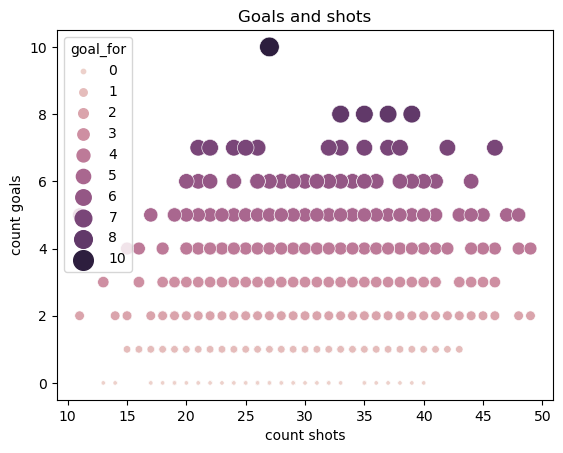

In [22]:
sns.scatterplot(data=data, x="shot_for", y="goal_for", hue="goal_for", size="goal_for", sizes=(10, 200), legend="full")

plt.xlabel('count shots')  
plt.ylabel('count goals')
plt.title('Goals and shots')
plt.show()

#### **3.2. Расчет побед и поражений по сезонам**

* таблица основных показателей по итогу матчей

In [23]:
data.groupby('season')['game_result'].describe()

,count,unique,top,freq
season,,,,
2008,82,3,LOSE,39
2009,82,3,LOSE,37
2010,82,3,LOSE,38
2011,82,3,LOSE,38
2013,82,3,WIN,35
2014,82,3,WIN,42
2015,82,3,LOSE,42
2016,82,3,WIN,46
2017,82,3,WIN,42


* график исходов матчей по игровым сезонам 2008 - 2023

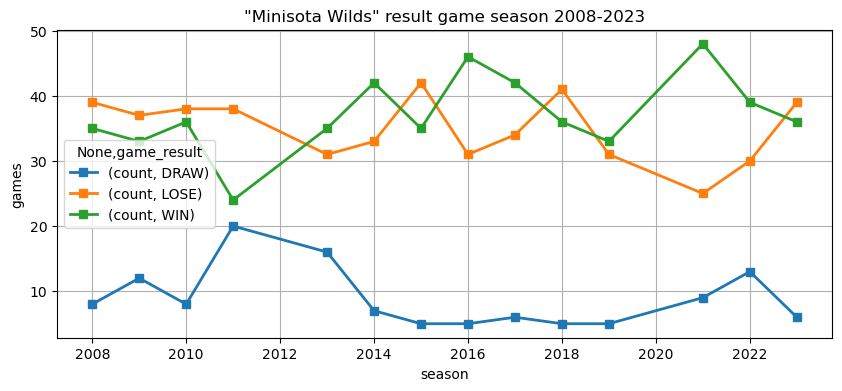

In [24]:
data.pivot_table(index = ['season'],
                        columns='game_result',
                        values='game_id',
                        aggfunc=['count']).plot(figsize=(10,4), linewidth=2, marker='s',
                                                grid=True, xlabel='season', ylabel='games',
                                                title='"Minisota Wilds" result game season 2008-2023')
plt.show()

#### **3.3. Зависимость количества забитых голов при играх дома и на выезде**

* таблица количества забитых голов на играх дома и на выезде

In [25]:
goals_h_a = data.pivot_table(index='goal_for', columns='location', values='date', aggfunc='count') 
goals_h_a

location,away,home
goal_for,,
0,37.0,32.0
1,121.0,80.0
2,130.0,132.0
3,113.0,123.0
4,99.0,96.0
5,45.0,57.0
6,15.0,33.0
7,5.0,10.0
8,2.0,3.0


* диаграмма зависимости забитых голов в матчах дома и на выезде, суммарно за игровые сезоны 2008-2023

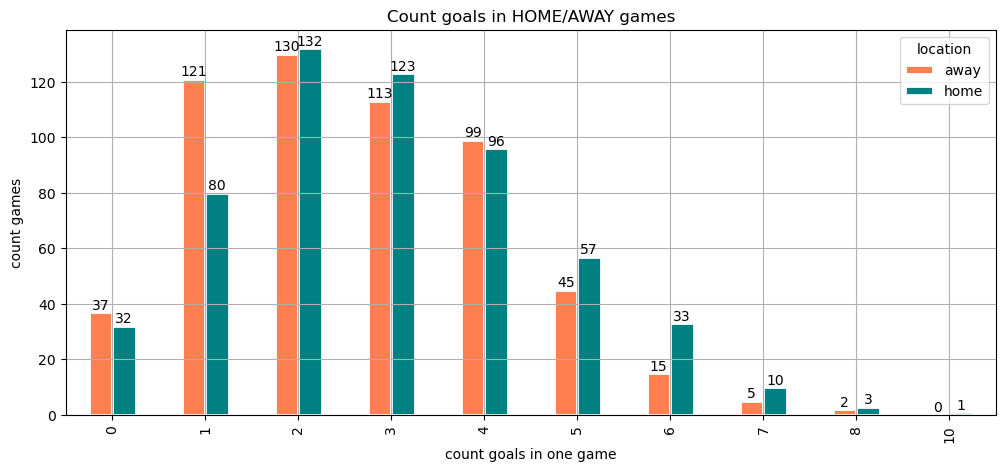

In [26]:
ax = goals_h_a.plot(kind='bar',figsize=(12,5), grid=True, color=['coral', 'teal'], edgecolor='white', linewidth=2)

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xlabel('count goals in one game')  
ax.set_ylabel('count games')
plt.title('Count goals in HOME/AWAY games')
plt.show()

#### **3.4. Забитые и пропущенные шайбы в играх дома и на выезде**

* таблица забитых и пропущенных шайб

In [27]:
goals_w_l = data.pivot_table(index='season', columns='location', values=['goal_for', 'goal_again'], aggfunc=['sum'])

* переименование столбцов

In [28]:
goals_w_l.columns = ['miss_away', 'miss_home', 'score_away', 'score_home']
goals_w_l.head(3)

,miss_away,miss_home,score_away,score_home
season,,,,
2008,103,94,93,121
2009,124,115,86,128
2010,113,115,99,104


* таблица забитых и пропущенных шайб по игровым сезонам 2008-2023

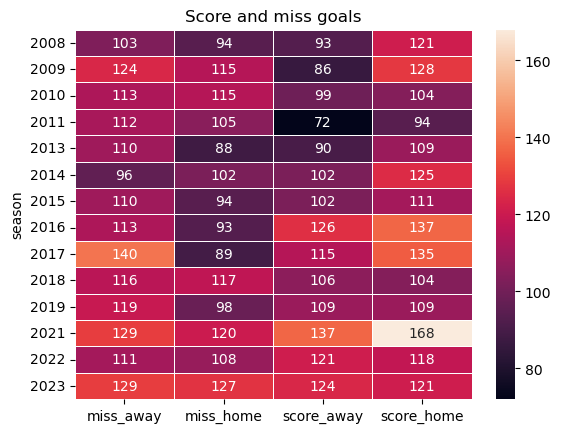

In [29]:
sns.heatmap(goals_w_l, annot=True, fmt=".0f", linewidth=.5)
plt.title('Score and miss goals')
plt.show()

#### **3.5. Зависимость выигранных матчей при играх дома и на выезде**

* таблица выигранных матчей при играх дома и на выезде за период 2008 - 2023

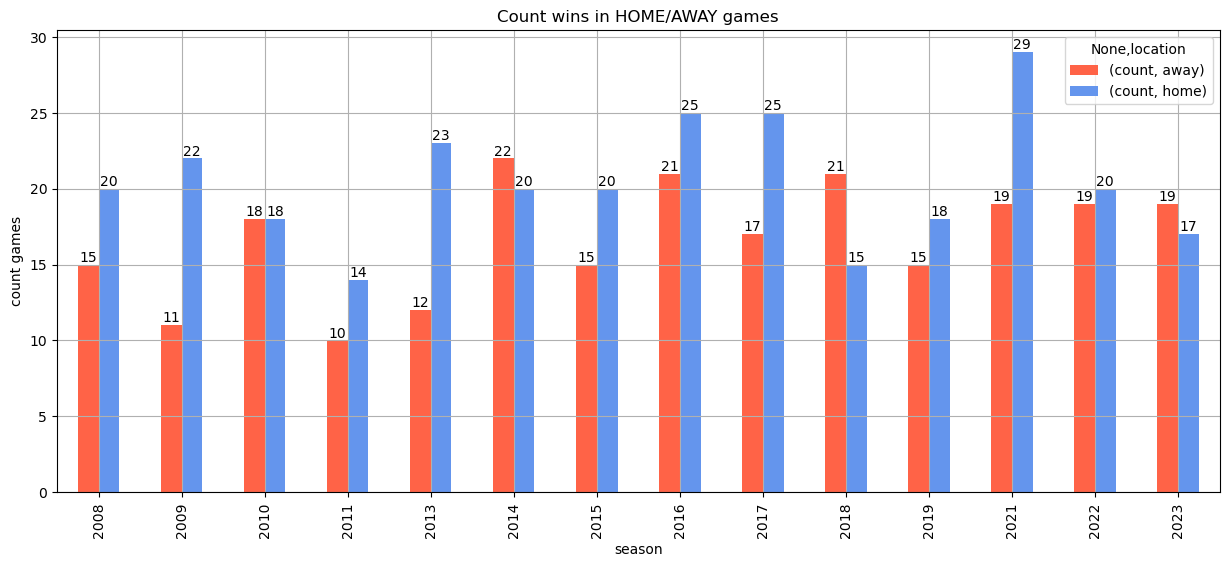

In [30]:
df_win = data[data['game_result']=='WIN']

ax = df_win.pivot_table(index = ['season'], columns='location', values='date',
                        aggfunc=['count']).plot(kind='bar',figsize=(15,6), grid=True,
                        color=['tomato', 'cornflowerblue'])

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xlabel('season')  
ax.set_ylabel('count games')
plt.title('Count wins in HOME/AWAY games')

plt.show()

#### **3.6. Исход матчей за последние 3 сезона**

* таблица исходов матчей по годам и переименование столбцов

In [31]:
games_itog = data.pivot_table(index = ['season'], columns='game_result', values='game_id', aggfunc=['count'])
games_itog.columns = ['DRAW', 'LOSE', 'WIN']
games_itog.head(3)

,DRAW,LOSE,WIN
season,,,
2008,8,39,35
2009,12,37,33
2010,8,38,36


* круговые диаграммы исходов игры за последние три игровых сезона

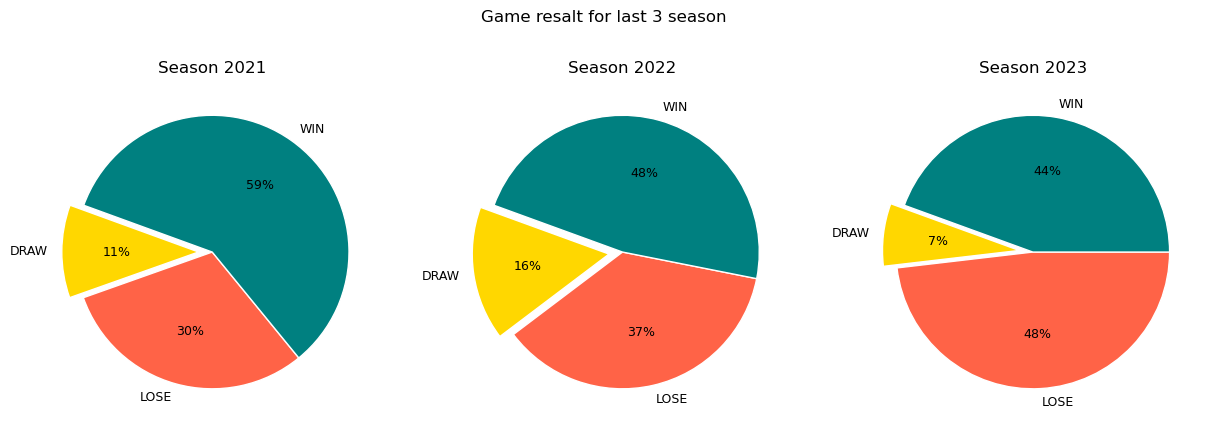

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Game resalt for last 3 season')

labels=['DRAW', 'LOSE', 'WIN']
colours = {'WIN':'teal', 'LOSE':'tomato', 'DRAW':'gold'}
           
games_itog.loc[2021].plot.pie(ax=ax1, autopct='%1.0f%%', explode=[0.1, 0, 0], ylabel='', 
                     legend=False,labeldistance=1.1, wedgeprops={'lw':1, 'ls':'-','edgecolor':"white"},
                     subplots=True, textprops={'fontsize':9}, colors=[colours[key] for key in labels],
                     startangle=160)
ax1.set_title('Season 2021')

games_itog.loc[2022].plot.pie(ax=ax2, autopct='%1.0f%%', explode=[0.1, 0, 0], ylabel='', 
                     legend=False,labeldistance=1.1, wedgeprops={'lw':1, 'ls':'-','edgecolor':"white"},
                     subplots=True, textprops={'fontsize':9}, colors=[colours[key] for key in labels],
                     startangle=160)
ax2.set_title('Season 2022')

games_itog.loc[2023].plot.pie(ax=ax3, autopct='%1.0f%%', explode=[0.1, 0, 0], ylabel='', 
                     legend=False,labeldistance=1.1, wedgeprops={'lw':1, 'ls':'-','edgecolor':"white"},
                     subplots=True, textprops={'fontsize':9}, colors=[colours[key] for key in labels],
                     startangle=160)
ax3.set_title('Season 2023')
plt.show()

#### **3.7. Наибольшее количество овертаймов**

* команда соперник, с кем больше всего встреч в овертайме, с учетом исхода игр после овертайма

In [33]:
df_overtime = data.query('ice_time > 3600')

df_overtime = df_overtime.pivot_table(index='opposition',
                                              columns='game_result',
                                              values='game_id',
                                              aggfunc=['count'])

* заполнение нулевых значений, замена наименований столбцов и изменение типа данных

In [34]:
df_overtime = df_overtime.fillna(0)

df_overtime.columns = ['DRAW', 'LOSE', 'WIN']

df_overtime = df_overtime.astype('int32')
df_overtime.head(3)

,DRAW,LOSE,WIN
opposition,,,
ANA,4,1,6
ARI,3,3,1
BOS,2,4,1


* таблица общего количества игр с каждой командой соперником, за все игровые сезоны

In [35]:
game_opposition = data.groupby('opposition')['game_id'].agg('count').reset_index() # если убрать reset будет Series
game_opposition.head(3)

,opposition,game_id
0,ANA,46
1,ARI,48
2,BOS,25


* объединение таблиц 

In [36]:
df_overtime = df_overtime.merge(game_opposition, on='opposition', how='left') 
df_overtime.head(3)

,opposition,DRAW,LOSE,WIN,game_id
0,ANA,4,1,6,46
1,ARI,3,3,1,48
2,BOS,2,4,1,25


* переименовать столбец

In [37]:
df_overtime = df_overtime.rename(columns = {'game_id':'games'})

* суммарное количество овертаймов с каждой командой

In [38]:
df_overtime['overtime'] = df_overtime['DRAW'] + df_overtime['LOSE'] + df_overtime['WIN']
df_overtime = df_overtime.sort_values(by = 'overtime', ascending=False)

* замена пропусков и вывод 7 команд с наибольшим количеством овертаймов

In [39]:
df_overtime = df_overtime.fillna(0)
df_overtime.head(7)

,opposition,DRAW,LOSE,WIN,games,overtime
9,DAL,6,7,3,59,16
6,CGY,8,4,3,54,15
23,STL,8,5,2,57,15
16,NSH,5,2,6,58,13
13,L.A,7,4,2,46,13
7,CHI,7,2,3,57,12
0,ANA,4,1,6,46,11


* круговая диаграмма с самой сложная команда соперником по количеству овертаймов

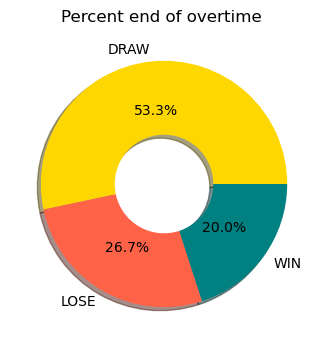

In [40]:
df_overtime.iloc[1, 1:4].plot.pie(figsize=(4, 4), autopct='%1.1f%%', wedgeprops=dict(width=0.6), ylabel='',
                                     title="Percent end of overtime ", shadow=True,
                                     colors=[colours[key] for key in labels])
plt.show()

#### **3.8. Процент забитых голов из совершенных бросков по воротам**

* таблица забитых голов и бросков в створ ворот

In [41]:
df_goals_shots = data.pivot_table(index=['opposition'],
                              values=['goal_for', 'shot_for'],
                              aggfunc=['sum']).sort_values(by=('sum', 'goal_for'), ascending=False)
df_goals_shots.head()

sum         
           goal_for shot_for
opposition                  
COL             170     2016
EDM             167     1613
CHI             158     1688
STL             157     1577
NSH             157     1709

* переименование столбцов

In [42]:
df_goals_shots.columns = ['goals', 'shots']

* расчет процента забитых шайб от бросков по воротам

In [43]:
df_goals_shots[['goals', 'shots']] = df_goals_shots[['goals', 'shots']].astype('int32')
df_goals_shots['percent_shots'] = (df_goals_shots['goals'] / df_goals_shots['shots']*100).round(2)
df_goals_shots = df_goals_shots.sort_values(by='percent_shots', ascending=True)
df_goals_shots.head(5)

,goals,shots,percent_shots
opposition,,,
BOS,59,752,7.8
TOR,57,716,8.0
COL,170,2016,8.4
ANA,124,1448,8.6
CBJ,93,1073,8.7


* распределение процента заброшенных шайб относительно бросков в створ ворот

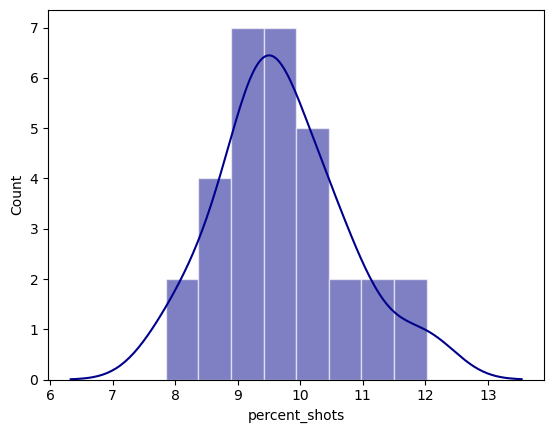

In [44]:
sns.histplot(df_goals_shots['percent_shots'], alpha=.5, edgecolor=(1, 1, 1, .6), 
             kde=True, bins=8, color = 'darkblue', kde_kws=dict(cut=3))
plt.show()

### **4. Проверка гипотез**

#### **4.1. Выигранные  вбрасывания при выигранных/проигранных играх**

* **гипотеза Н0 - средние количество выигранных вбрасываний в выигранных и проигранных играх равны**
* **гипотеза Н1 - средние количество выигранных вбрасываний в выигранных и проигранных играх неравны**

* таблицы для построения диаграмм с выигранными вбрасываниями при условии выигранных либо проигранных играх

In [45]:
df_gmwin = data.loc[data['game_result']=='WIN']
df_gmlose = data.loc[data['game_result']=='LOSE']
df_gmlose.head(3)

,season,game_id,opposition,location,date,ice_time,goal_for,shot_for,goal_again,shot_again,f_off_win,f_off_lose,game_result
4,2008,2008020096,BUF,home,2008-10-23,3644,3,33,4,24,28,27,LOSE
7,2008,2008020134,DAL,away,2008-10-29,3600,2,21,4,33,28,30,LOSE
8,2008,2008020141,MTL,home,2008-10-30,3600,1,29,2,21,20,25,LOSE


* график распределения выигрнаных вбрасываний при выигранных либо проигранных играх

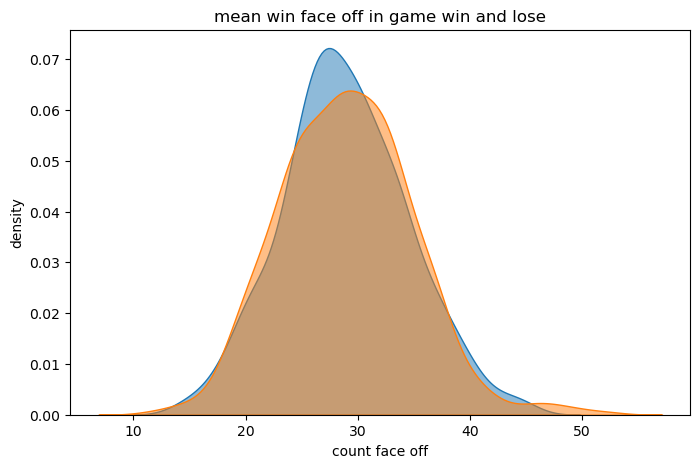

In [46]:
plt.figure(figsize = (8,5))
sns.kdeplot(df_gmwin['f_off_win'], fill=True, alpha=0.5, linewidth=1.0)
sns.kdeplot(df_gmlose['f_off_win'], fill=True, alpha=0.5, linewidth=1.0)
plt.xlabel('count face off')
plt.ylabel('density')
plt.title('mean win face off in game win and lose')
plt.show()

* проверка гипотезы

In [47]:
alpha = 0.05

results = st.ttest_ind(df_gmwin['f_off_win'], df_gmlose['f_off_win'], alternative='two-sided')

print('медиана выигранные вбрасывания при выигранных играх:', df_gmwin['f_off_win'].median())
print('медиана выигранные вбрасывания при проигранных играх:', df_gmlose['f_off_win'].median())
print()
print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

медиана выигранные вбрасывания при выигранных играх: 29.0
медиана выигранные вбрасывания при проигранных играх: 29.0

p-значение: 0.7334818966382479
Не получилось отвергнуть нулевую гипотезу


### **4.2. Выигранные и проигранные вбрасывания**

* **гипотеза Н0 - средние количество выигранных вбрасываний в выигранных играх и проигранных вбрасываний в проигранных играх равны**
* **гипотеза Н1 - средние количество выигранных вбрасываний в выигранных играх больше чем проигранных вбрасываний в проигранных играх равны**

* график распределения выигрнаных вбрасываний в выигранных играх и проигранных вбрасываний в проигранных играх

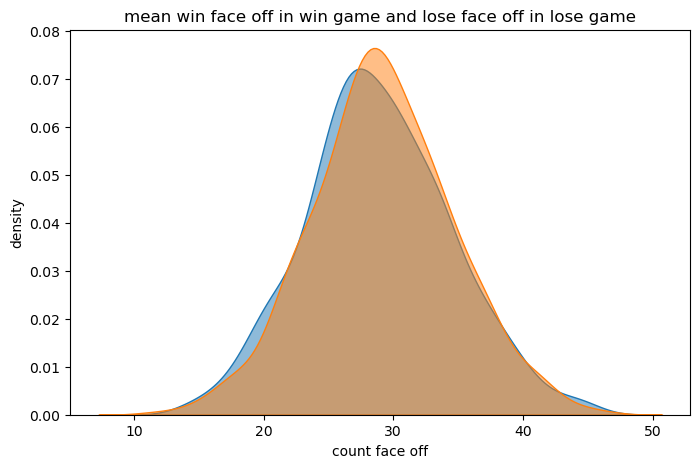

In [48]:
plt.figure(figsize = (8,5))
sns.kdeplot(df_gmwin['f_off_win'], fill=True, alpha=0.5, linewidth=1.0)
sns.kdeplot(df_gmlose['f_off_lose'], fill=True, alpha=0.5, linewidth=1.0)
plt.xlabel('count face off')
plt.ylabel('density')
plt.title('mean win face off in win game and lose face off in lose game')
plt.show()

* проверка гипотезы

In [49]:
alpha = 0.05

results = st.ttest_ind(df_gmwin['f_off_win'], df_gmlose['f_off_lose'], alternative='greater')

print('среднее выигранные вбрасывания при выигранных играх:', df_gmwin['f_off_win'].mean())
print('среднее проигранные вбрасывания при проигранных играх:', df_gmlose['f_off_win'].mean())
print()
print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

среднее выигранные вбрасывания при выигранных играх: 28.878846153846155
среднее проигранные вбрасывания при проигранных играх: 29.00204498977505

p-значение: 0.8017242714694197
Не получилось отвергнуть нулевую гипотезу
